<a href="https://colab.research.google.com/github/ricardopeloi/alura_imersao_python/blob/Altera%C3%A7%C3%B5es/Aula_4_Imers%C3%A3o_Python_An%C3%A1lise_Velas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

## Básicos (numpy, pandas, math, display, locale, time, random)

In [1]:
# !python -m pip install pandas
# !python -m pip install openpyxl
# !python -m pip install xlrd
# !python -m pip install jupyter
# !python -m pip install numpy
# # !python -m pip install random
# !python -m pip install IPython


from IPython.display import display

import pandas as pd
import math
import numpy as np
import locale
# locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")  # Use "" for auto, or force e.g. to "en_US.UTF-8"

import time
from datetime import datetime, timedelta, date
import random

import openpyxl

## Visualização (matplotlib, seaborn, plotly)

In [2]:
# !python -m pip install matplotlib
# !python -m pip install seaborn
!python -m pip install plotly

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Finanças (yfinance, mplfinance)

In [3]:
# https://pypi.org/project/yfinance/
# https://github.com/ranaroussi/yfinance/wiki/Ticker

!python -m pip install yfinance
import yfinance as yf

!pip install mplfinance
import mplfinance as mpf

# # Em R
# # https://cran.r-project.org/web/packages/BatchGetSymbols/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 714.0 kB/s eta 0:00:00


# Leitura dos dados

'2024-04-23'

In [15]:
dados = yf.download(
    "PETR4.SA",
    start = "2023-01-01",
    # end = "2023-12-31",
    end = datetime.today().strftime("%Y-%m-%d")
    )

dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2024-04-16,39.009998,39.709999,38.950001,39.490002,39.490002,37303000
2024-04-17,39.490002,39.950001,39.340000,39.779999,39.779999,39221700
2024-04-18,40.000000,40.590000,39.650002,39.849998,39.849998,45078800


# Análises

## Gráfico mais básico

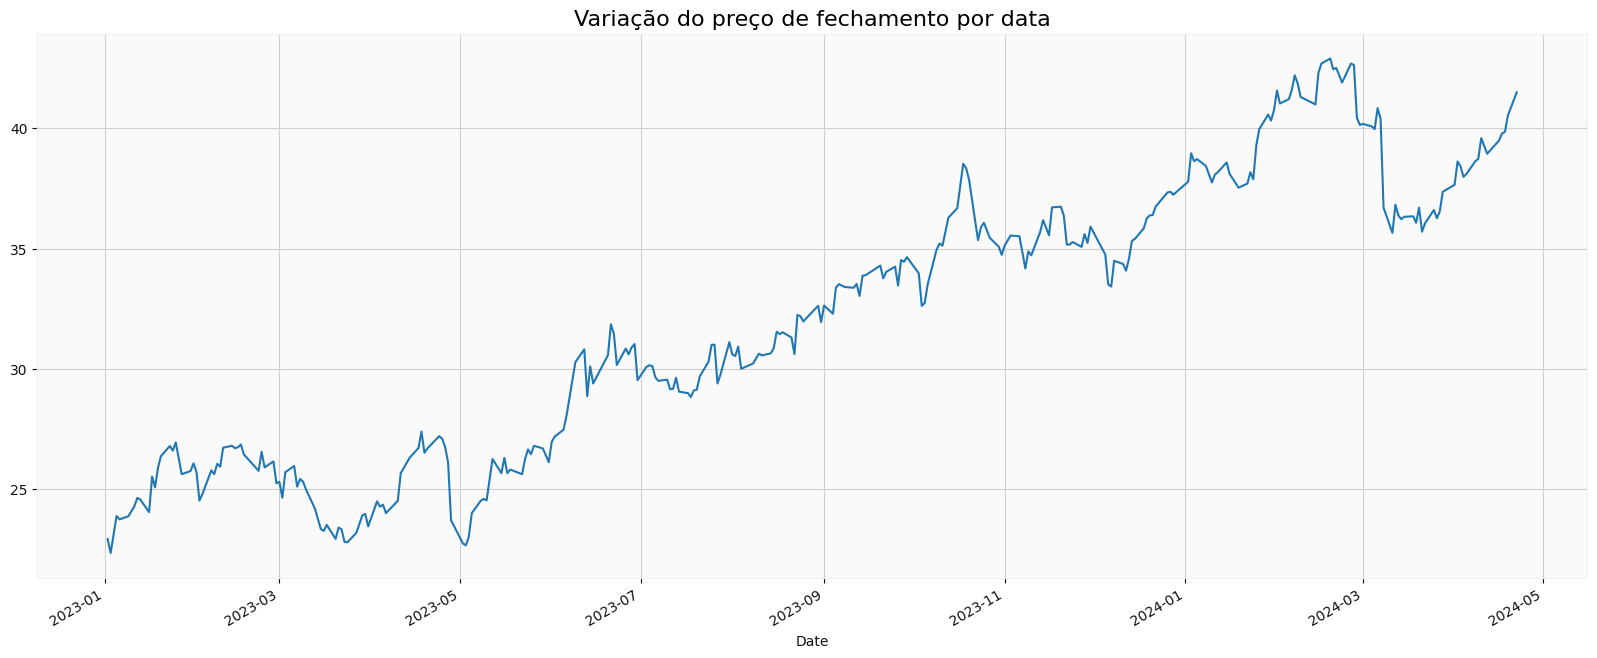

In [16]:
dados["Close"].plot(kind = "line", figsize = (20,8))
plt.title("Variação do preço de fechamento por data", fontsize = 16)

plt.show()

## Candle com matplotlib

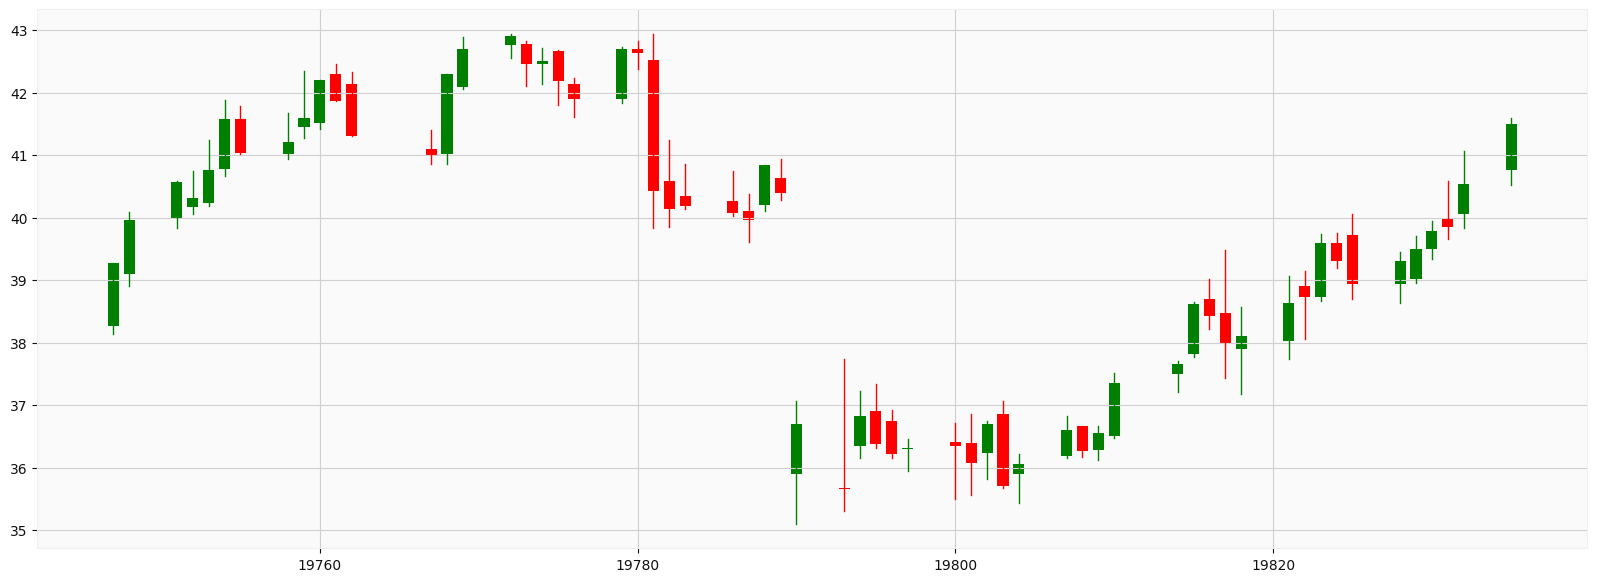

In [24]:
dados_candle_matp = dados.tail(60).copy()

dados_candle_matp["Data"] = dados_candle_matp.index
dados_candle_matp["Data"] = dados_candle_matp["Data"].apply(mdates.date2num)

# dados_candle_matp

fig, ax = plt.subplots(figsize = (20,7))

largura_candle = 0.7

for i in range(len(dados_candle_matp)):
  if dados_candle_matp["Close"].iloc[i] > dados_candle_matp["Open"].iloc[i]:
    cor = "green"
  else:
    cor = "red"

  ax.plot(
      [dados_candle_matp["Data"].iloc[i], dados_candle_matp["Data"].iloc[i]],
      [dados_candle_matp["Low"].iloc[i], dados_candle_matp["High"].iloc[i]],
      color = cor,
      linewidth = 1
  )

  ax.add_patch(plt.Rectangle(
    (dados_candle_matp["Data"].iloc[i] - largura_candle/2, min(dados_candle_matp["Open"].iloc[i], dados_candle_matp["Close"].iloc[i])),
    largura_candle,
    abs(dados_candle_matp["Close"].iloc[i] - dados_candle_matp["Open"].iloc[i]),
    facecolor = cor
  ))

## Adicionando média móvel

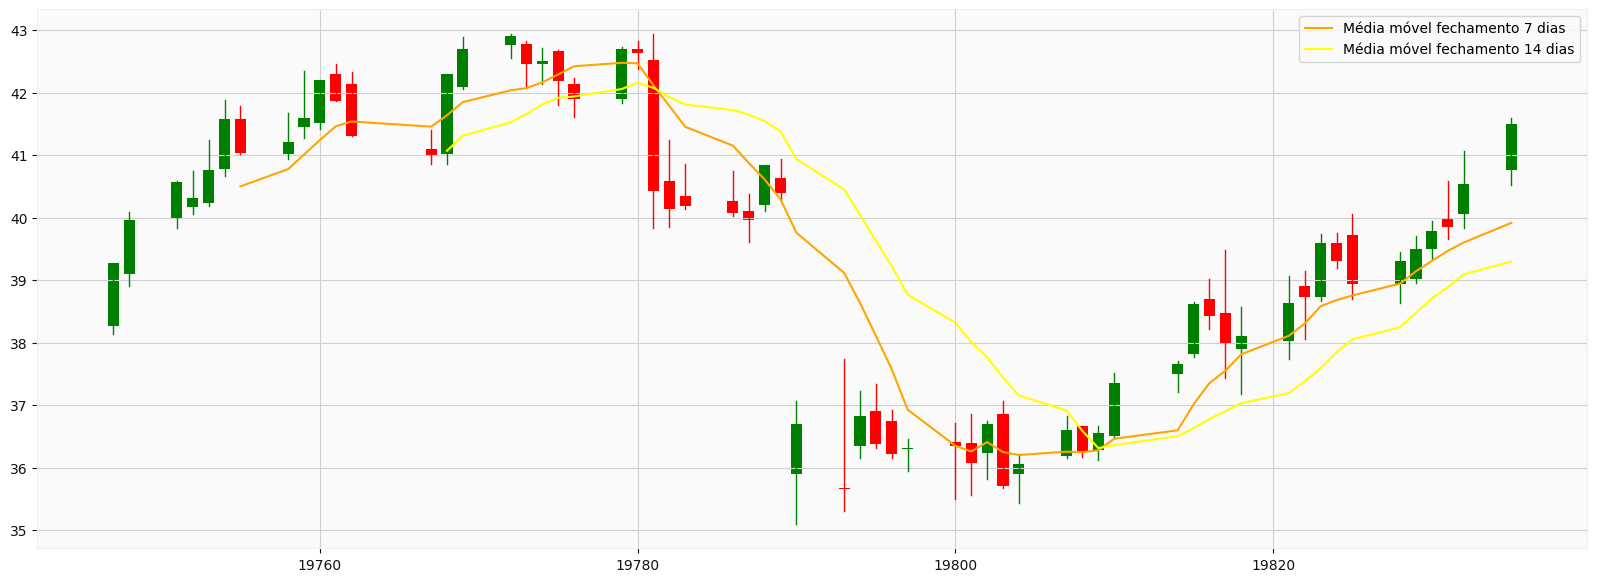

In [25]:
dados_candle_matp_media_movel = dados_candle_matp.copy()

dados_candle_matp_media_movel["Close 7 dias"] = dados_candle_matp_media_movel["Close"].rolling(window=7).mean()
dados_candle_matp_media_movel["Close 14 dias"] = dados_candle_matp_media_movel["Close"].rolling(window=14).mean()
# dados_candle_matp_media_movel

fig, ax = plt.subplots(figsize = (20,7))

largura_candle = 0.7

for i in range(len(dados_candle_matp_media_movel)):
  if dados_candle_matp_media_movel["Close"].iloc[i] > dados_candle_matp_media_movel["Open"].iloc[i]:
    cor = "green"
  else:
    cor = "red"

  ax.plot(
      [dados_candle_matp_media_movel["Data"].iloc[i], dados_candle_matp_media_movel["Data"].iloc[i]],
      [dados_candle_matp_media_movel["Low"].iloc[i], dados_candle_matp_media_movel["High"].iloc[i]],
      color = cor,
      linewidth = 1
  )

  ax.add_patch(plt.Rectangle(
    (dados_candle_matp_media_movel["Data"].iloc[i] - largura_candle/2, min(dados_candle_matp_media_movel["Open"].iloc[i], dados_candle_matp_media_movel["Close"].iloc[i])),
    largura_candle,
    abs(dados_candle_matp_media_movel["Close"].iloc[i] - dados_candle_matp_media_movel["Open"].iloc[i]),
    facecolor = cor
  ))

ax.plot(dados_candle_matp_media_movel["Data"], dados_candle_matp_media_movel["Close 7 dias"], color = "orange", label = "Média móvel fechamento 7 dias")
ax.plot(dados_candle_matp_media_movel["Data"], dados_candle_matp_media_movel["Close 14 dias"], color = "yellow", label = "Média móvel fechamento 14 dias")

ax.legend()

## Adicionar formatação de eixos e valores

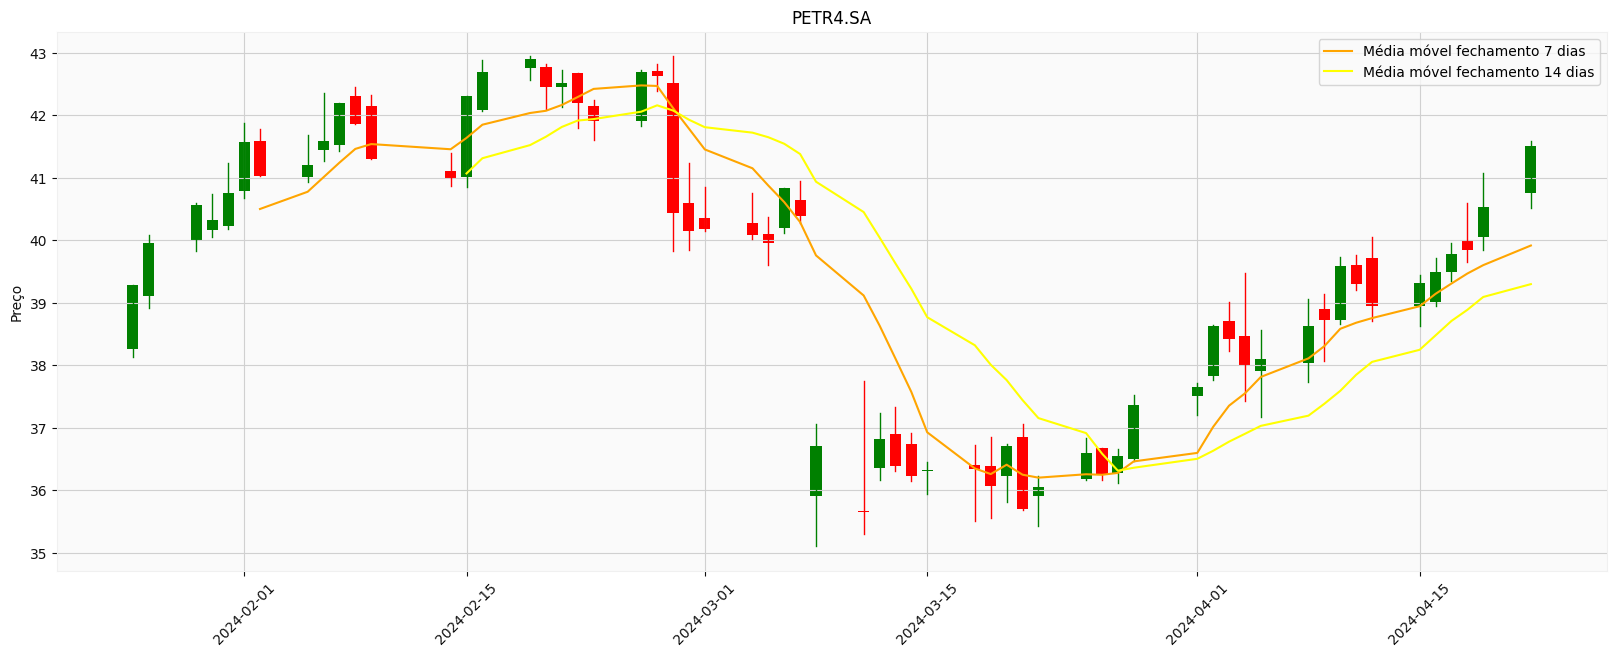

In [26]:
dados_candle_matp_media_movel = dados_candle_matp.copy()

dados_candle_matp_media_movel["Close 7 dias"] = dados_candle_matp_media_movel["Close"].rolling(window=7).mean()
dados_candle_matp_media_movel["Close 14 dias"] = dados_candle_matp_media_movel["Close"].rolling(window=14).mean()
# dados_candle_matp_media_movel

fig, ax = plt.subplots(figsize = (20,7))
# plt.grid("True")

largura_candle = 0.7

for i in range(len(dados_candle_matp_media_movel)):
  if dados_candle_matp_media_movel["Close"].iloc[i] > dados_candle_matp_media_movel["Open"].iloc[i]:
    cor = "green"
  else:
    cor = "red"

  ax.plot(
      [dados_candle_matp_media_movel["Data"].iloc[i], dados_candle_matp_media_movel["Data"].iloc[i]],
      [dados_candle_matp_media_movel["Low"].iloc[i], dados_candle_matp_media_movel["High"].iloc[i]],
      color = cor,
      linewidth = 1
  )

  ax.add_patch(plt.Rectangle(
    (dados_candle_matp_media_movel["Data"].iloc[i] - largura_candle/2, min(dados_candle_matp_media_movel["Open"].iloc[i], dados_candle_matp_media_movel["Close"].iloc[i])),
    largura_candle,
    abs(dados_candle_matp_media_movel["Close"].iloc[i] - dados_candle_matp_media_movel["Open"].iloc[i]),
    facecolor = cor
  ))

ax.plot(dados_candle_matp_media_movel["Data"], dados_candle_matp_media_movel["Close 7 dias"], color = "orange", label = "Média móvel fechamento 7 dias")
ax.plot(dados_candle_matp_media_movel["Data"], dados_candle_matp_media_movel["Close 14 dias"], color = "yellow", label = "Média móvel fechamento 14 dias")

ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation = 45)

plt.title("PETR4.SA")
plt.ylabel("Preço")
plt.grid("True")

plt.show()

## Agora bem mais fácil com Plotly

In [27]:
fig = make_subplots(
    rows = 2,
    cols = 1,
    shared_xaxes = True,
    vertical_spacing = 0.1,
    subplot_titles = ("Candlesticks", "Volume transacionado"),
    row_width = [0.2, 0.7]
)

fig.add_trace(go.Candlestick(x=dados_candle_matp_media_movel.head(60).index,
                    open = dados_candle_matp_media_movel['Open'],
                    high = dados_candle_matp_media_movel['High'],
                    low = dados_candle_matp_media_movel['Low'],
                    close = dados_candle_matp_media_movel['Close']),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=dados_candle_matp_media_movel.head(60).index,
                    y = dados_candle_matp_media_movel['Close 7 dias'],
                    mode = "lines",
                    name = "Média móvel fechamento 7 dias",
                    marker=dict(color="orange")),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=dados_candle_matp_media_movel.head(60).index,
                    y = dados_candle_matp_media_movel['Close 14 dias'],
                    mode = "lines",
                    name = "Média móvel fechamento 14 dias",
                    marker=dict(color="yellow")),
              row = 1, col = 1)

fig.add_trace(go.Bar(x=dados_candle_matp_media_movel.head(60).index,
                    y = dados_candle_matp_media_movel['Volume'],
                    name = "Volume"),
              row = 2, col = 1)


fig.update_layout(
    yaxis_title = "Preço",
    xaxis_rangeslider_visible=False,
    title="PETR4.SA",
    )

fig.show()

## Mais fácil ainda com MPFinance

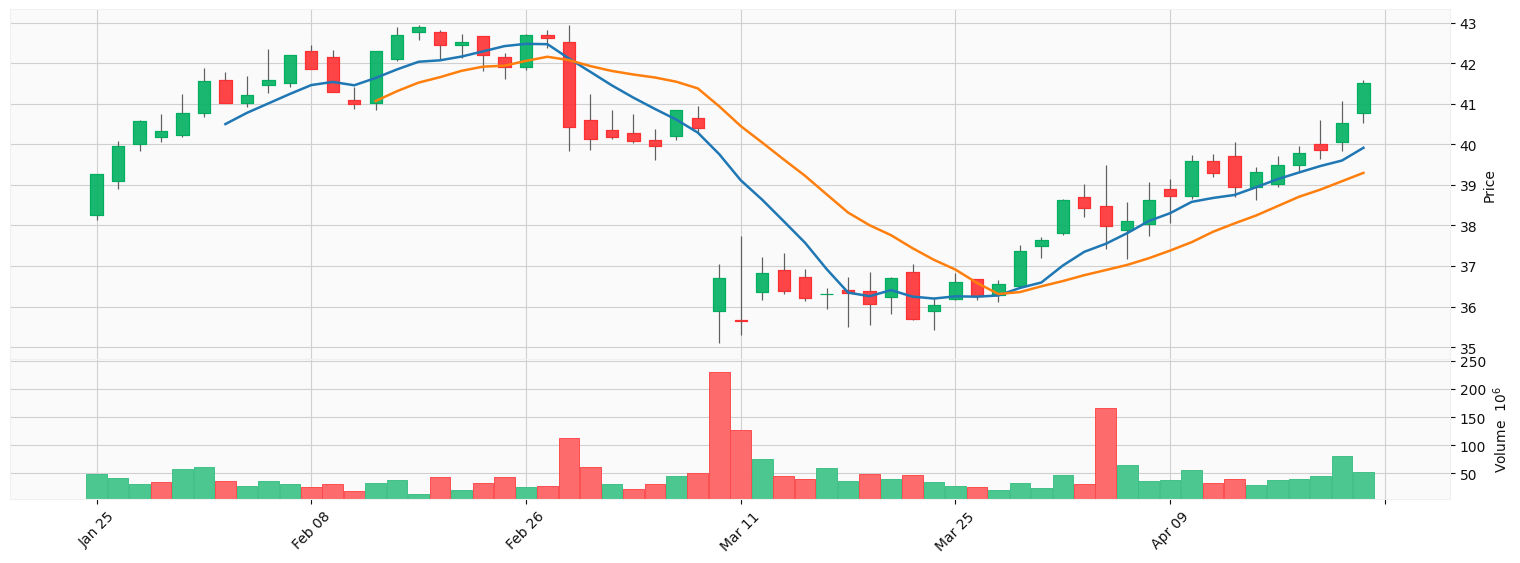

In [28]:
mpf.plot(dados_candle_matp_media_movel.head(60), type = "candle", figsize = (20,7), volume = True, mav = (7,14), style = "yahoo")

## Criando minha API para ficar igual MPFinance, mas usando Plotly

In [29]:
def candle_plot(
    dados,
    volume = True,
    mav = np.nan,
    colors = ["orange", "yellow", "blue"],
    titulo = "",
    ):

  if volume == True:
    fig = make_subplots(
        rows = 2,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ("Candlesticks", "Volume transacionado"),
        row_width = [0.2, 0.7]
    )
  else:
    fig = make_subplots(
        rows = 1,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ("Candlesticks"),
        row_width = [0.2, 0.7]
    )

  fig.add_trace(go.Candlestick(x=dados.index,
                      open = dados['Open'],
                      high = dados['High'],
                      low = dados['Low'],
                      close = dados['Close']),
                row = 1, col = 1)

  if mav is not np.nan:
    for i in range(len(mav)):
      # print(i)
      dados["Close "+ str(mav[i]) +" dias"] = dados["Close"].rolling(window=mav[i]).mean()
      fig.add_trace(go.Scatter(x=dados.index,
                          y = dados["Close "+ str(mav[i]) +" dias"],
                          mode = "lines",
                          name = "Média móvel fechamento " + str(mav[i]) + " dias",
                          marker=dict(color=colors[i])),
                    row = 1, col = 1)

  if volume == True:
    fig.add_trace(go.Bar(x=dados_candle_matp_media_movel.head(60).index,
                        y = dados_candle_matp_media_movel['Volume'],
                        name = "Volume"),
                  row = 2, col = 1)


  fig.update_layout(
      yaxis_title = "Preço",
      xaxis_rangeslider_visible=False,
      title=titulo,
      )

  fig.show()

candle_plot(
    dados = dados_candle_matp_media_movel.head(60),
    volume = True,
    mav = [7,14],
    # colors = ["orange", "yellow", "blue"],
    titulo = "PETR4.SA",
    )